### 装饰器
装饰器是一种可调用对象，其参数是另一个函数；

装饰器将被装饰的函数变为其他函数;装饰器在加载模块时立即执行。

In [14]:
def deco(func):
    print('decorating---')
    def inner():
        print(f"running inner!")
        func()
    return inner

@deco
def target():
    print(f"running target!")

target()



decorating---
running inner!
running target!


### 装饰器运行时间
装饰器在被装饰的函数定义之后立即执行,而被装饰的函数只在函数显示调用时运行。

In [13]:
registry = []
def register(func):
    print(f'running register({func})')
    registry.append(func)
    return func

@register
def f1():
    print('running f1()')

@register
def f2():
    print('running f2()')

def f3():
    print('running f3()')

def main():
    print('running main()')
    print('registry -> ', registry)
    f1()
    f2()
    f3()

# f1()

running register(<function f1 at 0x000001D0019014E0>)
running register(<function f2 at 0x000001D0019004A0>)


### 变量作用域规则

In [15]:
def f1(a):
    print(a)
    print(b)

f1(2)

2


NameError: name 'b' is not defined

In [16]:
b=3
def f1(a):
    print(a)
    print(b)

f1(2)

2
3


In [23]:
b=3
def f1(a):
    
    print(a)
    print(b)
    b=6
    

f1(2)

2


UnboundLocalError: cannot access local variable 'b' where it is not associated with a value

Python 编译函数主体时,判断 b 是局部变量,因为在函数内给它赋值了。在函数中赋值时,如果想让解释器把 b 当成全局变量,为它分配一个新  值,就要使用 global 声明。

在函数中，如果对变量进行赋值，Python会将其视为局部变量。

In [ ]:
b=3
def f1(a):
    global b
    print(a)
    print(b)
    b=6

f1(2)

2
3


In [48]:
def make_average():
    series = []
    def averager(new_value):
        series.append(new_value)
        return sum(series)/len(series)
    return averager

ave = make_average()
ave(10)

10.0

### nunlocal

In [54]:
def make_averager():
    count = 0
    total = 0
    
    def averager(new_value):
        nonlocal count, total
        count += 1 # 会隐式创建局部变量
        total += new_value
        return total/count
    
    return averager

ave = make_averager()
print(ave(10))
print(ave(11))
print(ave(12))

10.0
10.5
11.0


### 变量作用域
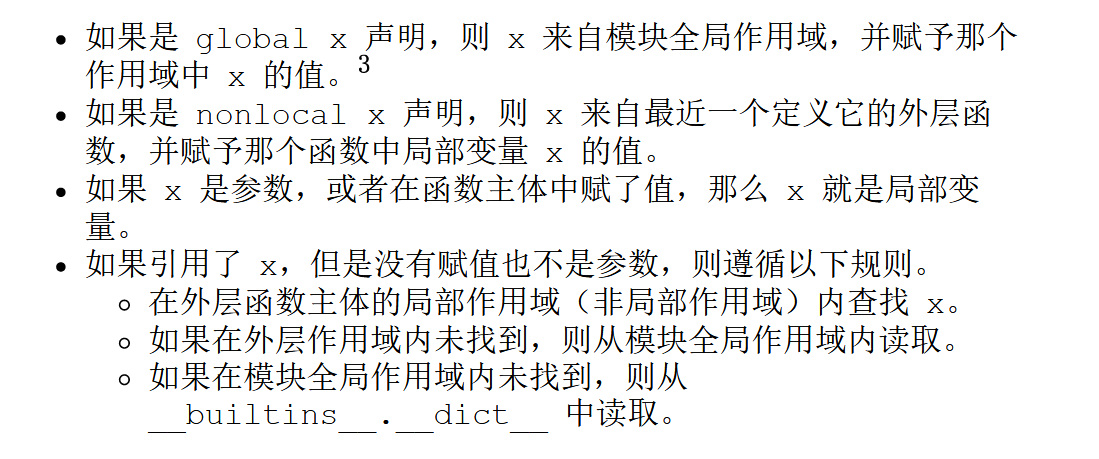

In [78]:
import time

def clock(func):
    def clocked(*args):
        t0 = time.perf_counter()
        result = func(*args)
        elapsed = time.perf_counter()-t0
        name = func.__name__
        arg_str = ','.join(repr(arg) for arg in args)
        print(arg_str)
        print(f'[{elapsed:0.8f}s] {name}({arg_str}) -> {result!r}')
        return result
    return clocked

In [79]:
@clock
def snooze(seconds):
    time.sleep(seconds)

@clock
def factorial(n):
    return 1 if n<2 else n*factorial(n-1)
    
print('*' * 40, 'Calling snooze(.123)')
snooze(.123)
print('*' * 40, 'Calling factorial(6)')
print('6! =', factorial(6))

**************************************** Calling snooze(.123)
0.123
[0.12319640s] snooze(0.123) -> None
**************************************** Calling factorial(6)
1
[0.00000070s] factorial(1) -> 1
2
[0.00003400s] factorial(2) -> 2
3
[0.00005650s] factorial(3) -> 6
4
[0.00007790s] factorial(4) -> 24
5
[0.00009980s] factorial(5) -> 120
6
[0.00012160s] factorial(6) -> 720
6! = 720


In [80]:
factorial.__name__

'clocked'

In [83]:
import time
import functools

def clock(func):
    @functools.wraps(func)
    def clocked(*args,**kwargs):
        t0 = time.perf_counter()
        result = func(*args, **kwargs)
        elapsed = time.perf_counter()-t0
        name = func.__name__
        arg_list = [repr(arg) for arg in args]
        arg_list.extend(f'{k}={v!r}' for k,v in kwargs.items())
        arg_str = ','.join(arg_list)

        print(f'[{elapsed:0.8f}s] {name}({arg_str}) -> {result!r}')
        return result
    return clocked

In [86]:
@clock
def snooze(seconds):
    time.sleep(seconds)

@clock
def factorial(n):
    return 1 if n<2 else n*factorial(n-1)
    
print('*' * 40, 'Calling snooze(.123)')
snooze(.123)
print('*' * 40, 'Calling factorial(6)')
print('6! =', factorial(6))

**************************************** Calling snooze(.123)
[0.12309310s] snooze(0.123) -> None
**************************************** Calling factorial(6)
[0.00000080s] factorial(1) -> 1
[0.00002380s] factorial(2) -> 2
[0.00003850s] factorial(3) -> 6
[0.00005280s] factorial(4) -> 24
[0.00006730s] factorial(5) -> 120
[0.00008140s] factorial(6) -> 720
6! = 720


In [ ]:
factorial.__doc__

TypeError: 'NoneType' object is not callable

### 使用 functools.cache 做备忘
这是一项  优化技术,能把耗时的函数得到的结果保存起来,避免传入相同的参数 时重复计算。

@cache所装饰的函数所接受的参数必须可哈希，其适合短期运行的命令脚本，否则，若缓存较大，内存可能被耗尽。、

In [94]:
@clock
def fibonacci(n):
    if n<2:
        return n
    return fibonacci(n-1)+fibonacci(n-2)

fibonacci(6)

[0.00000110s] fibonacci(1) -> 1
[0.00000070s] fibonacci(0) -> 0
[0.00020010s] fibonacci(2) -> 1
[0.00000040s] fibonacci(1) -> 1
[0.00023780s] fibonacci(3) -> 2
[0.00000040s] fibonacci(1) -> 1
[0.00000040s] fibonacci(0) -> 0
[0.00003380s] fibonacci(2) -> 1
[0.00030650s] fibonacci(4) -> 3
[0.00000030s] fibonacci(1) -> 1
[0.00000030s] fibonacci(0) -> 0
[0.00003350s] fibonacci(2) -> 1
[0.00000030s] fibonacci(1) -> 1
[0.00006890s] fibonacci(3) -> 2
[0.00041050s] fibonacci(5) -> 5
[0.00000040s] fibonacci(1) -> 1
[0.00000040s] fibonacci(0) -> 0
[0.00003510s] fibonacci(2) -> 1
[0.00000040s] fibonacci(1) -> 1
[0.00007440s] fibonacci(3) -> 2
[0.00000040s] fibonacci(1) -> 1
[0.00000040s] fibonacci(0) -> 0
[0.00003830s] fibonacci(2) -> 1
[0.00014900s] fibonacci(4) -> 3
[0.00059550s] fibonacci(6) -> 8


8

In [96]:
@functools.cache
@clock
def fibonacci(n):
    if n<2:
        return n
    return fibonacci(n-2)+fibonacci(n-1)

fibonacci(6)

[0.00000060s] fibonacci(0) -> 0
[0.00000060s] fibonacci(1) -> 1
[0.00015750s] fibonacci(2) -> 1
[0.00000080s] fibonacci(3) -> 2
[0.00018710s] fibonacci(4) -> 3
[0.00000070s] fibonacci(5) -> 5
[0.00022990s] fibonacci(6) -> 8


8

### @lru_cache
@lru_cache 的主要优势是可以通过 maxsize 参数限制内存用量上  限。maxsize 参数的默认值相当保守,只有 128,即缓存最多只能有  128 条。

决定是否把不同参数类型得到的结果分开保存。例如,在默认设置 下,被认为是值相等的浮点数参数和整数参数只存储一次,即 f(1) 调  用和 f(1.0) 调用只对应一个缓存条目。如果设为 typed=True,则  在不同的条目中存储可能不一样的结果

In [ ]:
@lru_cache(maxsize=2**20, typed=True)

In [103]:
registry = set()

def register(active = True):
    def decorate(func):
        print('running register' f'activate={active}->decorate({func})')
        if active:
            registry.add(func)
        else:
            registry.discard(func)
        return func
    return decorate
@register(active=False)
def f1():
    print("running f1")
@register(active = True)
def f2():
    print('running f2')
def f3():
    print('f3 is running')


running registeractivate=False->decorate(<function f1 at 0x000001D001C17F60>)
running registeractivate=True->decorate(<function f2 at 0x000001D001C17CE0>)


In [107]:
print(register()(f3))

running registeractivate=True->decorate(<function f3 at 0x000001D001C160C0>)
<function f3 at 0x000001D001C160C0>
